# Project E Simple Object Tracking - 01_Training_Dataset

The training dataset contains a total of 488 samples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.patches import Rectangle

In [3]:
label_names = {1: 'ball', 2: 'mug', 3: 'pen', 4: 'spoon', 5: 'notebook'}

data_training = np.load('/Users/a1han/Desktop/UFL_life/Fundamental_AI/Final_Project/Project_E__EEL584___Simple_Object_Tracking_export/training_data_projectE.npy')
labels_training = np.load('/Users/a1han/Desktop/UFL_life/Fundamental_AI/Final_Project/Project_E__EEL584___Simple_Object_Tracking_export/training_labels_projectE.npy',allow_pickle=True)

data_training.shape, labels_training.shape

((488, 15, 100, 100, 3), (488, 15, 5))

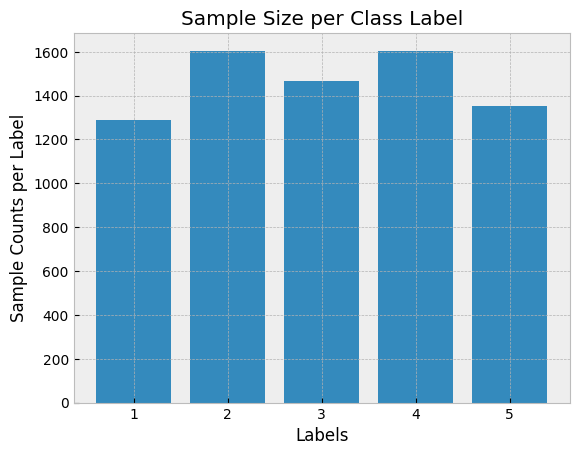

In [4]:
label, counts = np.unique(labels_training[:,:,0], return_counts=True)

plt.bar(label, counts)
plt.title('Sample Size per Class Label')
plt.ylabel('Sample Counts per Label')
plt.xlabel('Labels');
plt.show()

# Loading sample example

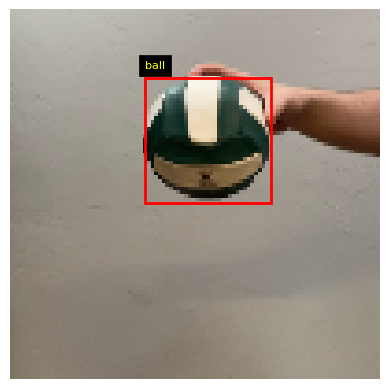

In [5]:
# Change idx to another video id
idx = 256

clip = data_training[idx]
clip_norm = clip.astype(np.float32)
if clip_norm.max() > 1.0:
    clip_norm /= 255.0
clip_bboxes = labels_training[idx]

fig, ax = plt.subplots()
im = ax.imshow(clip_norm[0])
ax.axis('off')

bbox_rect = Rectangle((0,0), 0, 0,
                      linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(bbox_rect)
bbox_text = ax.text(0, 0, '',
                    color='yellow', fontsize=8,
                    verticalalignment='bottom',
                    backgroundcolor='black')

def update(frame_idx):
    im.set_data(clip_norm[frame_idx])
    lbl, x, y, w, h = clip_bboxes[frame_idx]

    bbox_rect.set_xy((x, y))
    bbox_rect.set_width(w)
    bbox_rect.set_height(h)

    cmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow', 5: 'cyan'}
    bbox_rect.set_edgecolor(cmap.get(int(lbl), 'white'))

    bbox_text.set_position((x, y - 2))
    bbox_text.set_text(label_names.get(int(lbl), str(lbl)))

    return [im, bbox_rect, bbox_text]

anim = FuncAnimation(fig, update,
                     frames=clip_norm.shape[0],
                     interval=100,
                     blit=True)

HTML(anim.to_jshtml())

---